In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
from nltk.corpus import stopwords
import string

In [2]:
email_df = pd.read_csv('data/emailSpam.csv')

In [3]:
email_df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
email_df.shape

(5572, 2)

In [5]:
email_df.drop_duplicates(inplace=True)

In [6]:
email_df.shape

(5157, 2)

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NEPTUNE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
def procrss_text(text):
    # 1 remove punctuation 
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # 2 remove stopwords
    clean_word = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    return clean_word

In [9]:
email_df['Message'].head().apply(procrss_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [10]:
# convert a collection of text to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=procrss_text).fit_transform(email_df['Message'])

In [11]:
# split data to 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(messages_bow,email_df['Category'],test_size=0.20,random_state=0)

In [12]:
messages_bow.shape

(5157, 11422)

In [15]:
from sklearn import svm

In [23]:
classifier = svm.SVC().fit(x_train,y_train)

In [24]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(x_train)
print(classification_report(y_train,pred))
print()
print(confusion_matrix(y_train,pred))
print()
print(accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3619
           1       1.00      0.95      0.98       506

    accuracy                           0.99      4125
   macro avg       1.00      0.98      0.99      4125
weighted avg       0.99      0.99      0.99      4125


[[3619    0]
 [  23  483]]

0.9944242424242424


In [25]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(x_test)
print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       897
           1       1.00      0.67      0.81       135

    accuracy                           0.96      1032
   macro avg       0.98      0.84      0.89      1032
weighted avg       0.96      0.96      0.95      1032


[[897   0]
 [ 44  91]]

0.9573643410852714


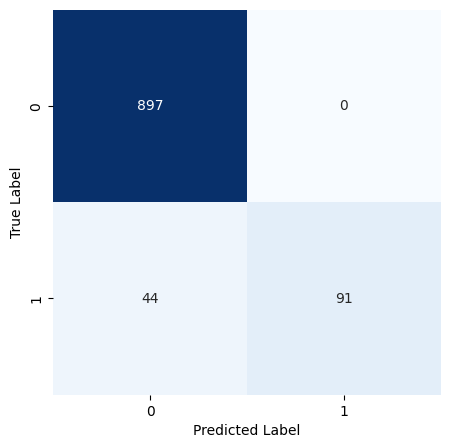

In [29]:
conf_mat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [30]:
classifier = svm.SVC(kernel='linear').fit(x_train,y_train)

In [31]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(x_train)
print(classification_report(y_train,pred))
print()
print(confusion_matrix(y_train,pred))
print()
print(accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3619
           1       1.00      1.00      1.00       506

    accuracy                           1.00      4125
   macro avg       1.00      1.00      1.00      4125
weighted avg       1.00      1.00      1.00      4125


[[3619    0]
 [   0  506]]

1.0


In [32]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(x_test)
print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       897
           1       1.00      0.82      0.90       135

    accuracy                           0.98      1032
   macro avg       0.99      0.91      0.94      1032
weighted avg       0.98      0.98      0.98      1032


[[897   0]
 [ 24 111]]

0.9767441860465116


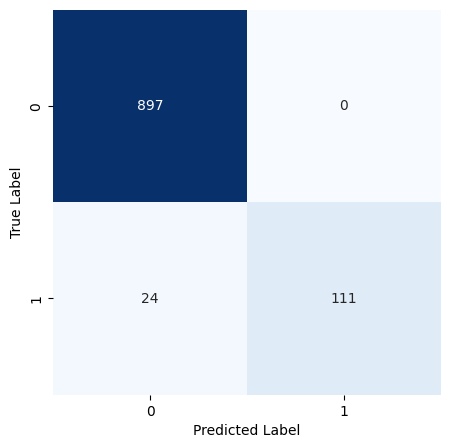

In [33]:
conf_mat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [58]:
classifier = svm.SVC(kernel='poly').fit(x_train,y_train)

In [59]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(x_train)
print(classification_report(y_train,pred))
print()
print(confusion_matrix(y_train,pred))
print()
print(accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3619
           1       1.00      0.90      0.95       506

    accuracy                           0.99      4125
   macro avg       0.99      0.95      0.97      4125
weighted avg       0.99      0.99      0.99      4125


[[3619    0]
 [  50  456]]

0.9878787878787879


In [60]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(x_test)
print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96       897
           1       1.00      0.38      0.55       135

    accuracy                           0.92      1032
   macro avg       0.96      0.69      0.75      1032
weighted avg       0.93      0.92      0.90      1032


[[897   0]
 [ 84  51]]

0.9186046511627907


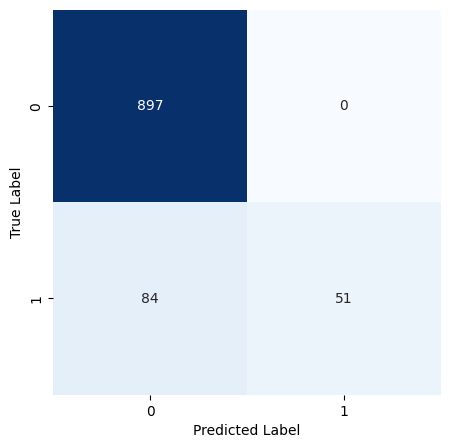

In [61]:
conf_mat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [62]:
classifier = svm.SVC(kernel='sigmoid').fit(x_train,y_train)

In [63]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(x_train)
print(classification_report(y_train,pred))
print()
print(confusion_matrix(y_train,pred))
print()
print(accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3619
           1       0.96      0.89      0.93       506

    accuracy                           0.98      4125
   macro avg       0.97      0.94      0.96      4125
weighted avg       0.98      0.98      0.98      4125


[[3601   18]
 [  54  452]]

0.9825454545454545


In [64]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(x_test)
print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       897
           1       0.95      0.79      0.86       135

    accuracy                           0.97      1032
   macro avg       0.96      0.89      0.92      1032
weighted avg       0.97      0.97      0.96      1032


[[891   6]
 [ 29 106]]

0.9660852713178295


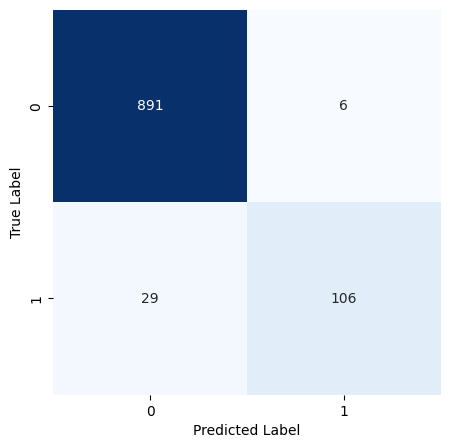

In [65]:
conf_mat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [71]:
classifier = svm.SVC(gamma=50).fit(x_train,y_train)

In [72]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(x_train)
print(classification_report(y_train,pred))
print()
print(confusion_matrix(y_train,pred))
print()
print(accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3619
           1       1.00      1.00      1.00       506

    accuracy                           1.00      4125
   macro avg       1.00      1.00      1.00      4125
weighted avg       1.00      1.00      1.00      4125


[[3619    0]
 [   0  506]]

1.0


In [73]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(x_test)
print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       897
           1       1.00      0.03      0.06       135

    accuracy                           0.87      1032
   macro avg       0.94      0.51      0.49      1032
weighted avg       0.89      0.87      0.82      1032


[[897   0]
 [131   4]]

0.873062015503876


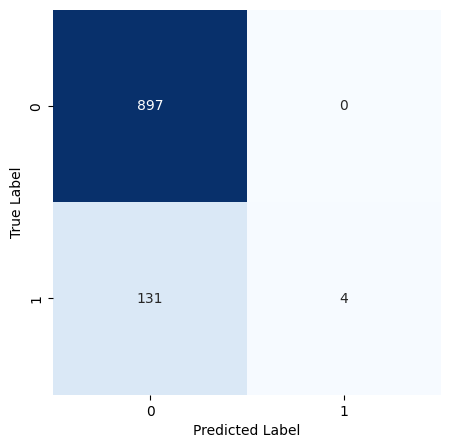

In [74]:
conf_mat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
classifier = svm.SVC(C=50).fit(x_train,y_train)

In [39]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(x_train)
print(classification_report(y_train,pred))
print()
print(confusion_matrix(y_train,pred))
print()
print(accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3619
           1       1.00      1.00      1.00       506

    accuracy                           1.00      4125
   macro avg       1.00      1.00      1.00      4125
weighted avg       1.00      1.00      1.00      4125


[[3619    0]
 [   0  506]]

1.0


In [40]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(x_test)
print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       897
           1       1.00      0.71      0.83       135

    accuracy                           0.96      1032
   macro avg       0.98      0.86      0.90      1032
weighted avg       0.96      0.96      0.96      1032


[[897   0]
 [ 39  96]]

0.9622093023255814


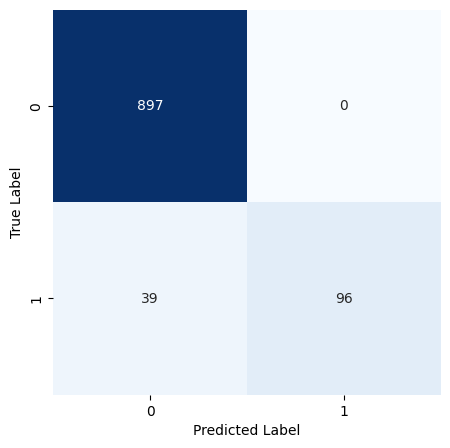

In [41]:
conf_mat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [54]:
classifier = svm.SVC(C=50,gamma=20).fit(x_train,y_train)

In [55]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(x_train)
print(classification_report(y_train,pred))
print()
print(confusion_matrix(y_train,pred))
print()
print(accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3619
           1       1.00      1.00      1.00       506

    accuracy                           1.00      4125
   macro avg       1.00      1.00      1.00      4125
weighted avg       1.00      1.00      1.00      4125


[[3619    0]
 [   0  506]]

1.0


In [56]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(x_test)
print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       897
           1       1.00      0.03      0.06       135

    accuracy                           0.87      1032
   macro avg       0.94      0.51      0.49      1032
weighted avg       0.89      0.87      0.82      1032


[[897   0]
 [131   4]]

0.873062015503876


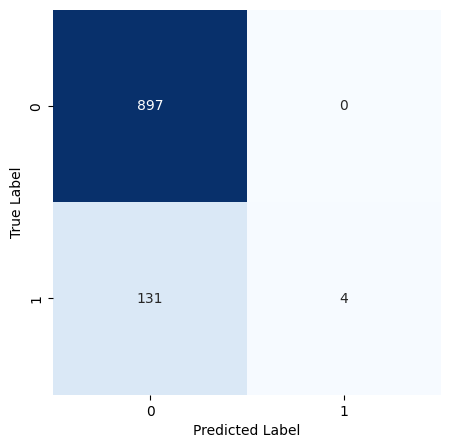

In [57]:
conf_mat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()